In [18]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def add_gaussian_noise(image, mean=0, sigma=50):
    """
    Adiciona ruído gaussiano a uma imagem.

    Parâmetros:
    - image: imagem de entrada (numpy array).
    - mean: média da distribuição gaussiana (padrão: 0).
    - sigma: desvio padrão da distribuição gaussiana (padrão: 25).

    Retorna:
    - Imagem com ruído gaussiano.
    """
    row, col  = image.shape
    gauss = np.random.normal(mean, sigma, (row, col))
    noisy = image + gauss
    return np.clip(noisy, 0, 255).astype(np.uint8)

def add_salt_and_pepper_noise(image, salt_prob, pepper_prob):
    """
    Adiciona ruído sal e pimenta a uma imagem.

    Parâmetros:
    - image: imagem de entrada (numpy array).
    - salt_prob: probabilidade de pixels sal (brancos).
    - pepper_prob: probabilidade de pixels pimenta (pretos).

    Retorna:
    - Imagem com ruído sal e pimenta.
    """
    row, col, ch = image.shape
    noisy = np.copy(image)

    # Adiciona ruído sal
    salt_pixels = np.random.rand(row, col) < salt_prob
    noisy[salt_pixels] = 255

    # Adiciona ruído pimenta
    pepper_pixels = np.random.rand(row, col) < pepper_prob
    noisy[pepper_pixels] = 0

    return noisy.astype(np.uint8)

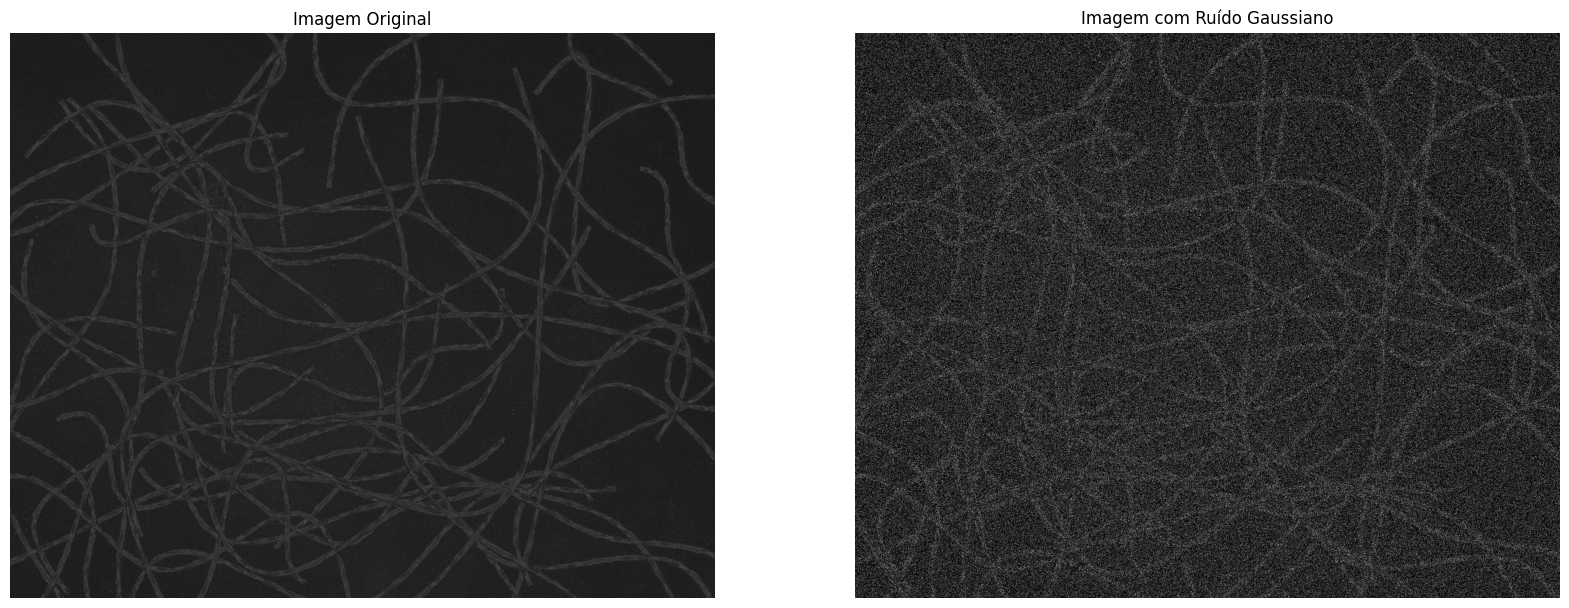

In [19]:
import sys

sys.path.insert(0, "/home/adriano/projeto_mestrado/modules")


root_dir = f"/home/adriano/projeto_mestrado/modules"

trein = f'/Treinamento_validacao/Imagens_Artificiais/Geradas_a_partir_de_1_mapa/pack1/imagens_artificiais/'


# Carregando a imagem de exemplo (substitua 'exemplo.jpg' pelo caminho da sua imagem)
imagem_original = cv2.imread(f'{root_dir}{trein}Experiment #1 (adults set #1)_20x_batch1 - Superfical layers@40-Image 1-20X_18_com_44.tiff', flags=cv2.IMREAD_GRAYSCALE)


# Adicionando ruído gaussiano à imagem
imagem_com_ruido = add_gaussian_noise(imagem_original)

# Exibindo as imagens original e com ruído
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(imagem_original, cv2.COLOR_BGR2RGB))
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(imagem_com_ruido, cv2.COLOR_BGR2RGB))
plt.title('Imagem com Ruído Gaussiano')
plt.axis('off')

#plt.savefig('img.png')
plt.show()

In [20]:
print(cv2.IMREAD_GRAYSCALE)

0


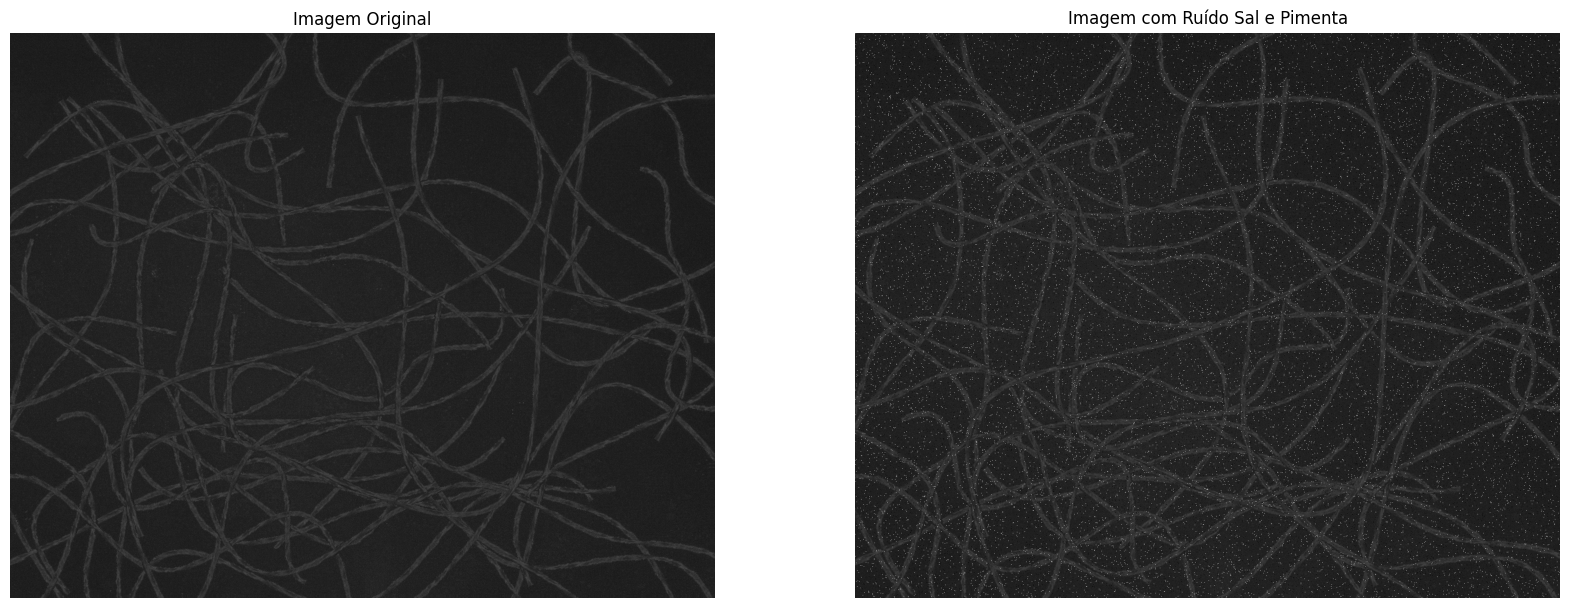

In [6]:
import sys

sys.path.insert(0, "/home/adriano/projeto_mestrado/modules")


root_dir = f"/home/adriano/projeto_mestrado/modules"

trein = f'/Treinamento_validacao/Imagens_Artificiais/Geradas_a_partir_de_1_mapa/pack1/imagens_artificiais/'

# Carregando a imagem de exemplo (substitua 'exemplo.jpg' pelo caminho da sua imagem)
imagem_original = cv2.imread(f'{root_dir}{trein}Experiment #1 (adults set #1)_20x_batch1 - Superfical layers@40-Image 1-20X_18_com_44.tiff')

# Adicionando ruído sal e pimenta à imagem
prob_salt = 0.01  # Probabilidade de pixels sal (brancos)
prob_pepper = 0.01  # Probabilidade de pixels pimenta (pretos)
imagem_com_ruido = add_salt_and_pepper_noise(imagem_original, prob_salt, prob_pepper)

# Exibindo as imagens original e com ruído
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(imagem_original, cv2.COLOR_BGR2RGB))
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(imagem_com_ruido, cv2.COLOR_BGR2RGB))
plt.title('Imagem com Ruído Sal e Pimenta')
plt.axis('off')
#plt.savefig('img_sal.png')
plt.show()